# Let's start with a quick view of dataset...



In [1]:
%matplotlib inline
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore") 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
os.environ['OMP_NUM_THREADS'] = '8' 

/kaggle/input/santa-workshop-tour-2019/family_data.csv
/kaggle/input/santa-workshop-tour-2019/sample_submission.csv


In [2]:
data = pd.read_csv('../input/santa-workshop-tour-2019/family_data.csv')

## We will fill a simple graph with days, families and related wishes.

In [3]:
g = nx.Graph()
color_map = []
size = []
# create app nodes
for i in tqdm(range (1,101)):
    temp = 'd'+str(i)
    g.add_node(temp, color='orange')#, type = 'day')
    
for i in tqdm(range (0,5000)):
    temp = 'f'+str(i)
    g.add_node(temp, color='blue')#, type = 'family')
    
for i in tqdm(range (0,len(data))):
    family = data.iloc[i,0]
    node_f = 'f'+str(family)
    participants = data.iloc[i,11]
    for j in range(1,11):
        day = data.iloc[i,j]
        node_d = 'd'+str(day)
        g.add_edge(node_f, node_d, type='wish',color = 'green', label=participants, weight= participants)

100%|██████████| 5000/5000 [00:01<00:00, 3232.83it/s]


## Now, we add colors.

In [4]:
for n1, attr in g.nodes(data=True):
    if attr['color'] == 'orange':
        color_map.append('orange')
    else:
        color_map.append('blue')

## We display our graph.

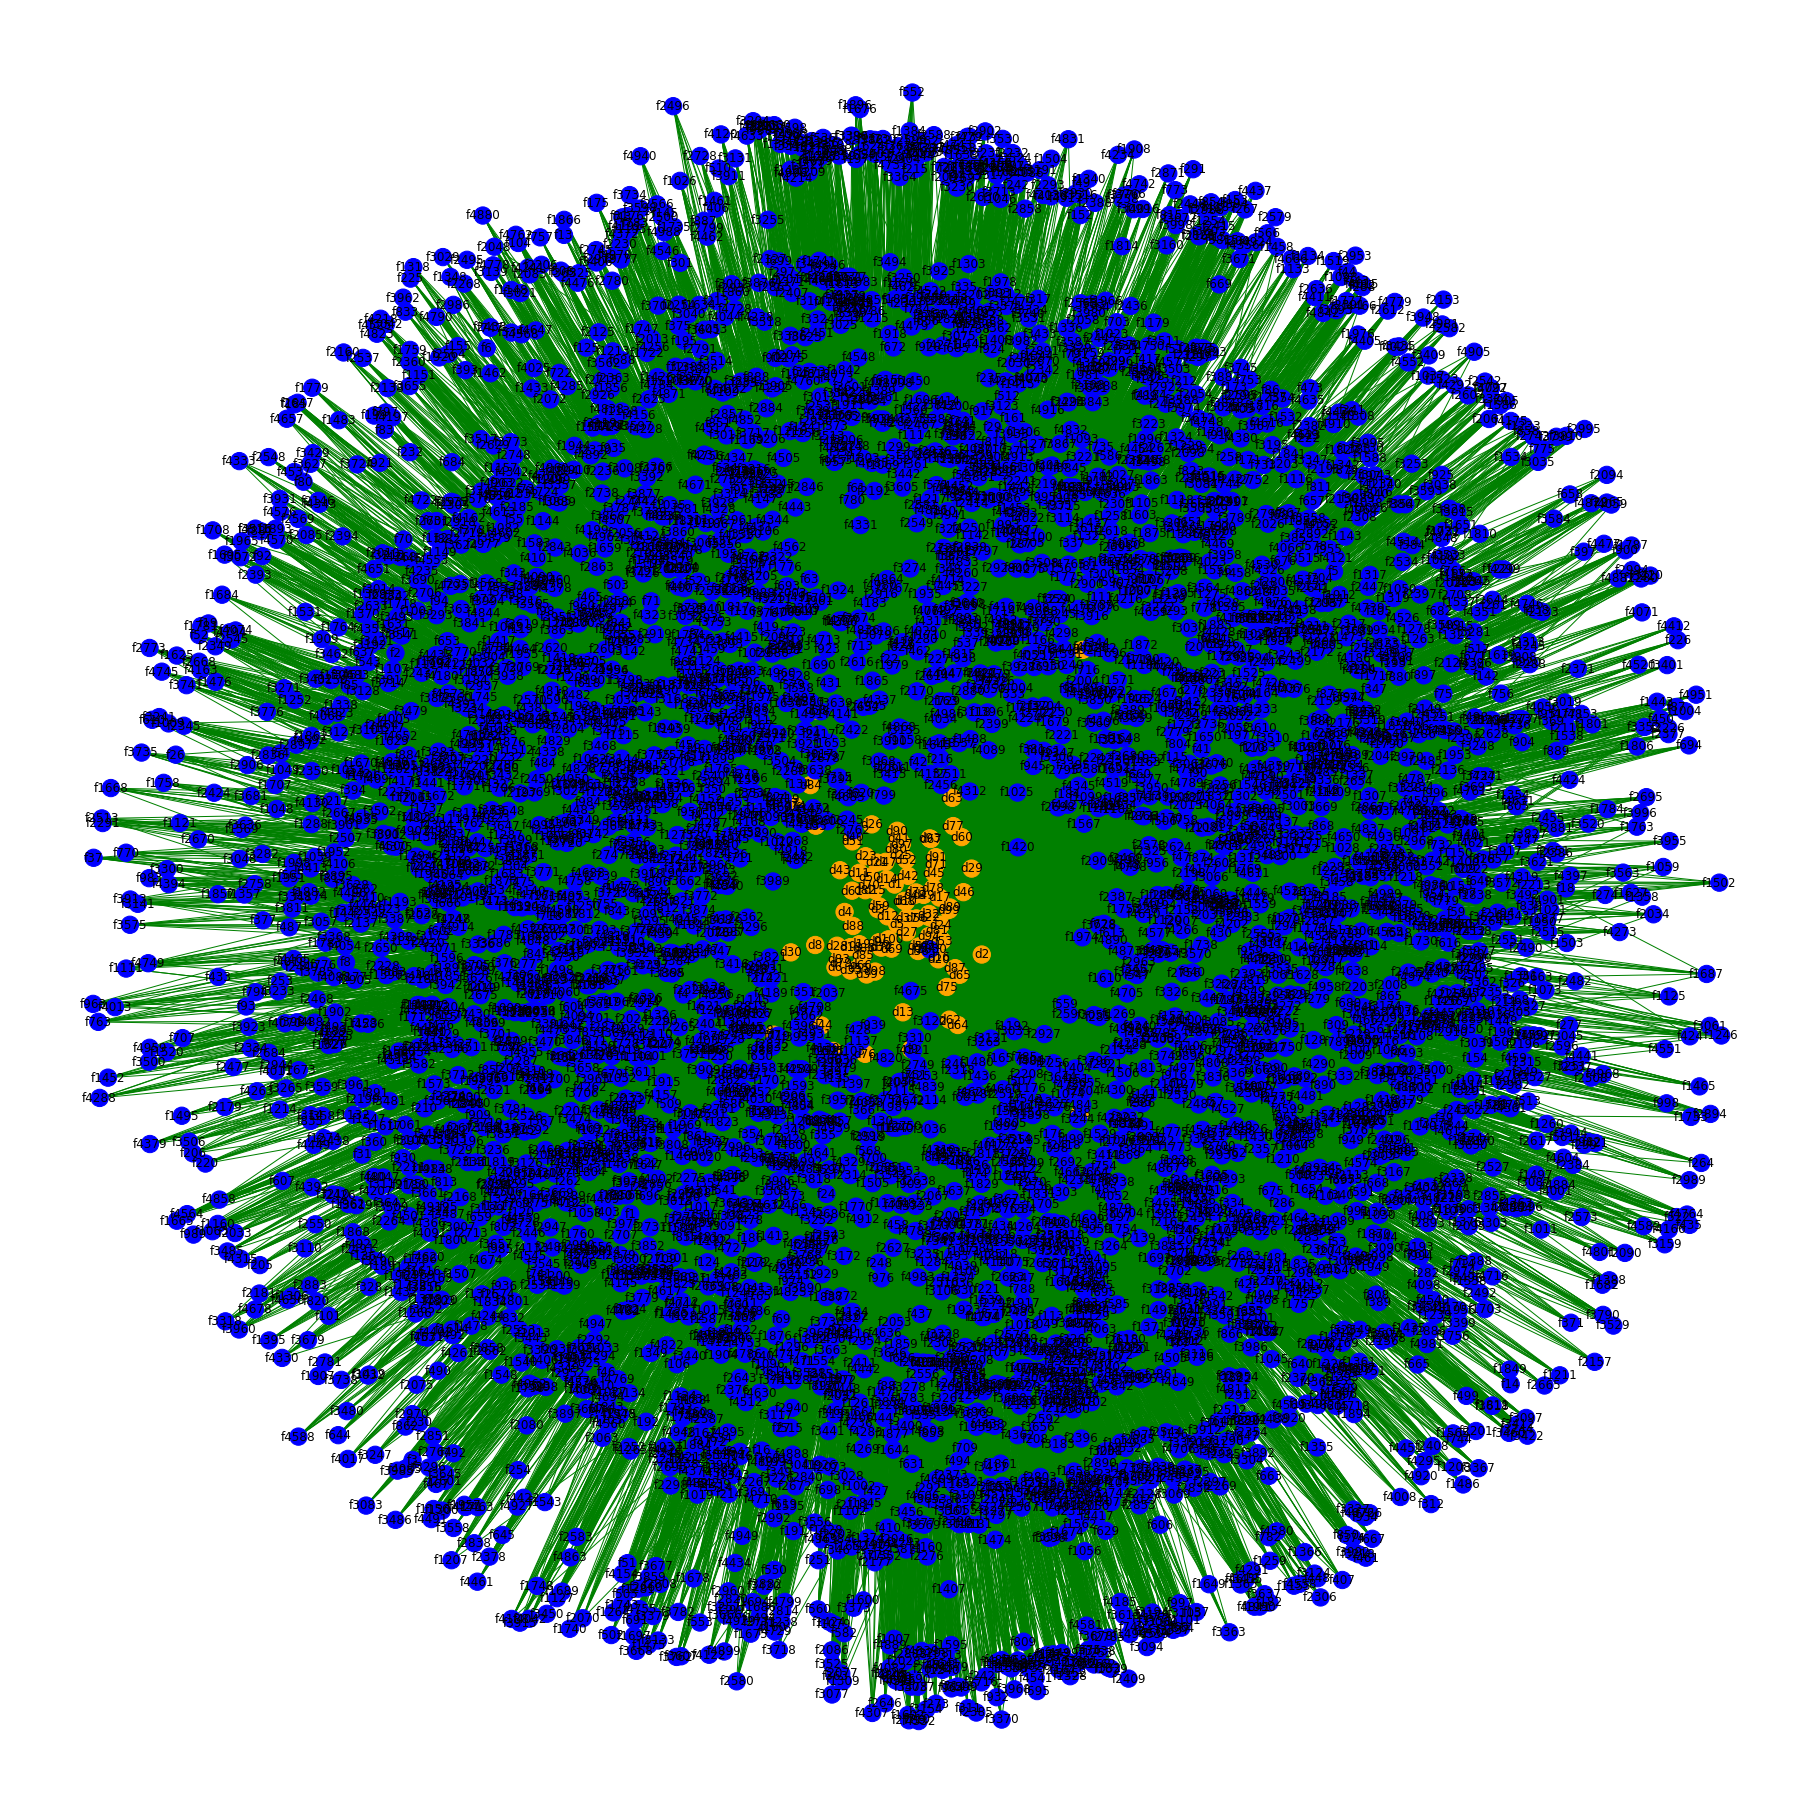

In [5]:
# Drawing Graph
plt.figure(3,figsize=(25,25))  
edges = g.edges()
colors = [g[u][v]['color'] for u,v in edges]
nx.draw(g, node_color = color_map, edge_color = colors, with_labels = True)

## Sanity check...

In [6]:
# Extract reference graph facts & metrics 
print('Graph')
print('Do we have a fully connected graph? ',nx.is_connected(g))
h = g.to_directed()
N, K = h.order(), h.size()
avg_deg= float(K) / N
print ("# Nodes: ", N)
print ("# Edges: ", K)
print ("Average connectivity degree: ", avg_deg)

Graph
Do we have a fully connected graph?  True
# Nodes:  5100
# Edges:  100000
Average connectivity degree:  19.607843137254903


## Ditribution of demand

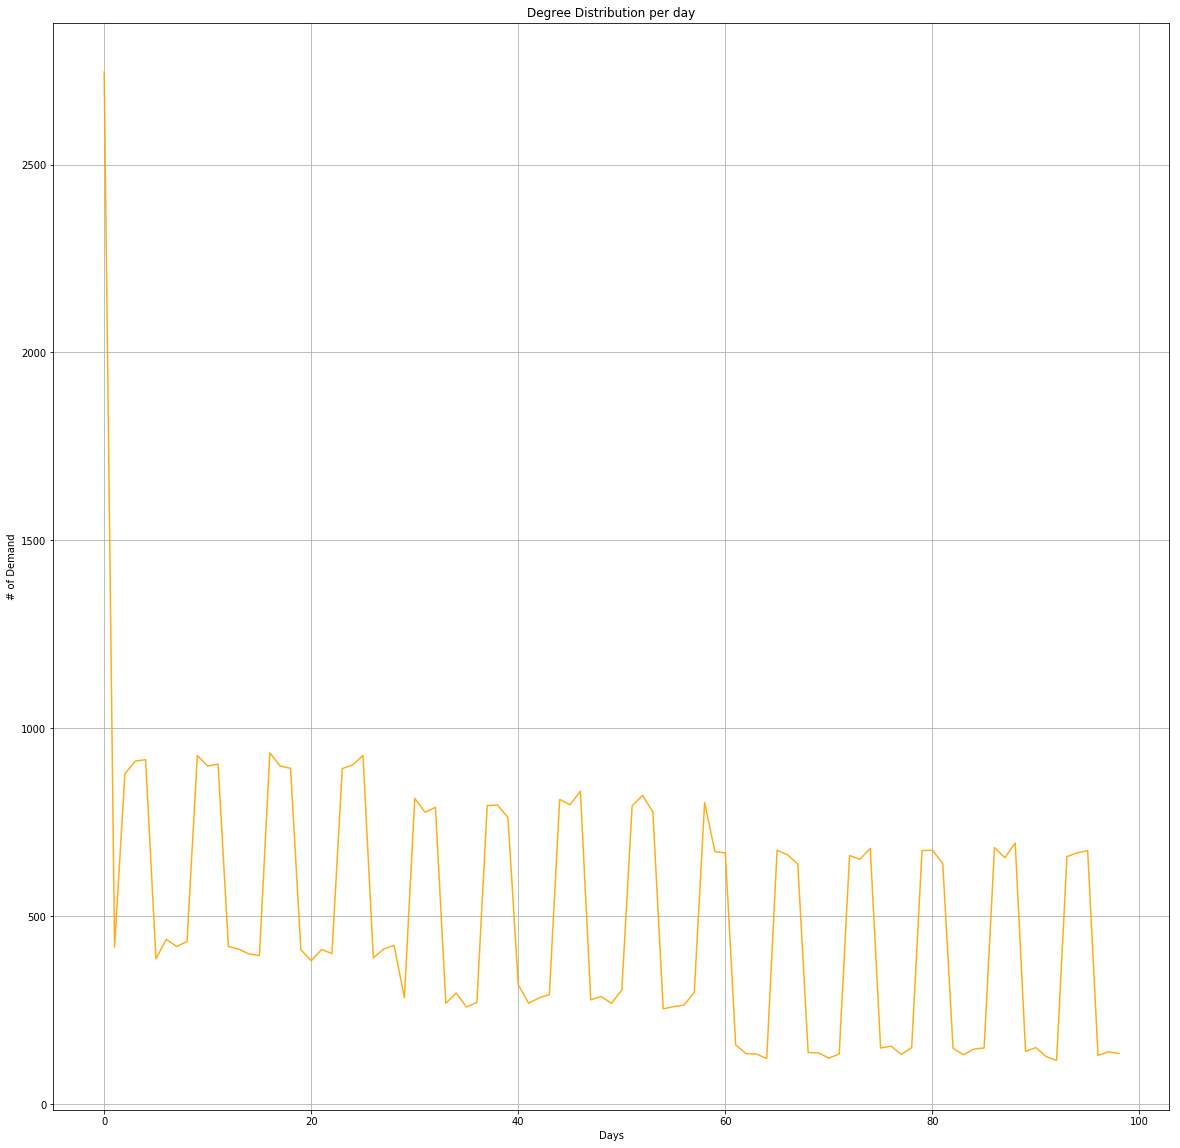

In [7]:
dis = []
in_degrees= h.in_degree() 
for i in in_degrees:
    dis.append(i[1])
fig = plt.figure(figsize=(20,20));
plt.title('Degree Distribution per day');
plt.grid(True);
plt.xlabel('Days');
plt.ylabel('# of Demand');
plt.plot(dis[0:99],color='orange',alpha=0.90);